<a href="https://colab.research.google.com/github/pripster/hello-world/blob/master/M1_Mini_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1Nu5A95jSdvPJEJIsHeKfWiWv9UrslSdD

# M1 - Mini-Assignment 2

Initially I import the modules/expansions I expect to use throughout the different exercies as well as the dataframe.

In [0]:
# Importing of modules/expansions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [0]:
# Importing dataframe
df_pokemon = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/pokemon.csv')

# 1. Unsupervised ML

***1a. Execute a PCA analysis on all numerical variables in the dataset. Hint: Don't
forget to scale them before. Use 4 components. What is the cumulative explained
variance ratio?***

In [49]:
# Before executing the PCA analysis I inspect the data to get an overview.
pd.DataFrame(df_pokemon).describe()

,Number,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [50]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
Number            800 non-null int64
Name              800 non-null object
Type1             800 non-null object
HitPoints         800 non-null int64
Attack            800 non-null int64
Defense           800 non-null int64
SpecialAttack     800 non-null int64
SpecialDefense    800 non-null int64
Speed             800 non-null int64
Generation        800 non-null int64
Legendary         800 non-null bool
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


As seen above the dataframe consists of 800 rows as well as 11 columns. It has been stated that no preprocessing of missing values is required, but before we can go ahead and do the PCA analysis we have to scale our dataframe as stated in the hint.

In [0]:
# Importing scaler from sklearn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# I create a new variable in which I store the columns I'm interested in.
df_pokemon_sf = df_pokemon.loc[:,'HitPoints':'Generation'] # All columns from 'Hitpoints' to 'Generation'.


# The actual scaling of the data
scaler = StandardScaler().fit(df_pokemon_sf)
df_pokemon_scaled = scaler.transform(df_pokemon_sf)


In [53]:
# The scaled mean and standard deviation is printed as well as the new dataframe.
print(df_pokemon_scaled[:,0].mean())
print(df_pokemon_scaled[:,0].std())

pd.DataFrame(df_pokemon_scaled).describe()

-2.486899575160351e-16
1.0


,0,1,2,3,4,5,6
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-2.660372e-16,-1.355860e-16,2.498002e-17,2.120526e-16,-1.171285e-16,-7.842685e-17,-1.629252e-15
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-2.674852e+00,-2.281379e+00,-2.209039e+00,-1.920993e+00,-1.866223e+00,-2.178804e+00,-1.399637e+00
25%,-7.546915e-01,-7.399327e-01,-7.650653e-01,-7.054650e-01,-7.875334e-01,-8.015032e-01,-7.973188e-01
50%,-1.668874e-01,-1.233542e-01,-1.232993e-01,-2.391303e-01,-6.840691e-02,-1.128526e-01,-1.950005e-01
75%,4.209167e-01,6.473688e-01,5.184667e-01,6.782494e-01,6.507196e-01,7.479606e-01,1.009636e+00
max,7.278632e+00,3.421972e+00,5.010829e+00,3.705602e+00,5.684605e+00,3.846888e+00,1.611954e+00


Now I move ahead with the PCA analysis below

In [0]:
# Importing the required module enabaling me to do the Principle Component Analysis (PCA)
from sklearn.decomposition import PCA

In [0]:
# As stated in the excercise the PCA analysis is completed using four components.
pca = PCA(n_components=4)

# The dataframe is transformed
df_pokemon_transformed = pca.fit_transform(df_pokemon_scaled)

In [56]:
# The .shape command is used to verify that have reduced our components to four.
df_pokemon_transformed.shape

(800, 4)

In [0]:
# In order to the cumulative explained variance ratio I plot the dataframe
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum': np.cumsum(pca.explained_variance_ratio_)}).stack

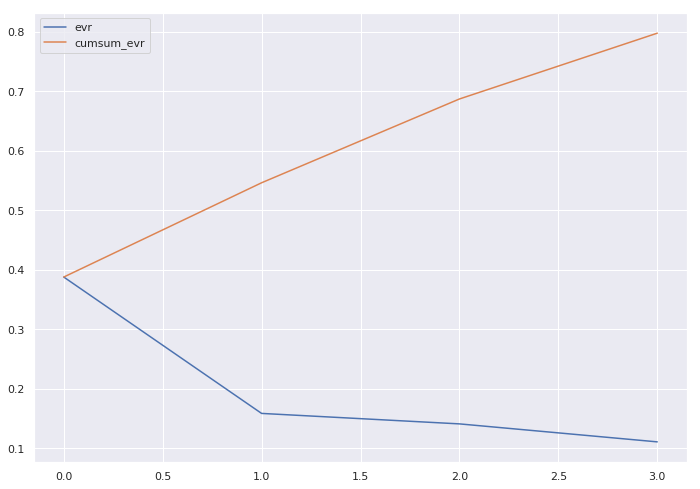

In [58]:
# In order to the cumulative explained variance ratio I plot the dataframe
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [59]:
# Estimating the cumulative explained variance ratio for four components
cevr = (pca.explained_variance_ratio_ * 100).sum()
cevr

79.80734261924614

**Conclusion:** After reducing the amount of components to four and visualizing it above we can see the that with four components we have only reduced the amount the original knowledge with roughly 20 percent. This is verified with the additional calculation which states the cumulative explained variance ratio to be 79.8 percent. This could be argued to a great loss of data, none the less we continue.

***1b. Perform a cluster analysis (either k-means or hierarchical clustering algorithm) on
all numerical variables (scaled & before PCA). Apply the elbow method to
determine a “pragmatic” number of clusters.***

In [0]:
# Initially we import KMeans from sk.learn to perform the cluster analysis.
from sklearn.cluster import KMeans

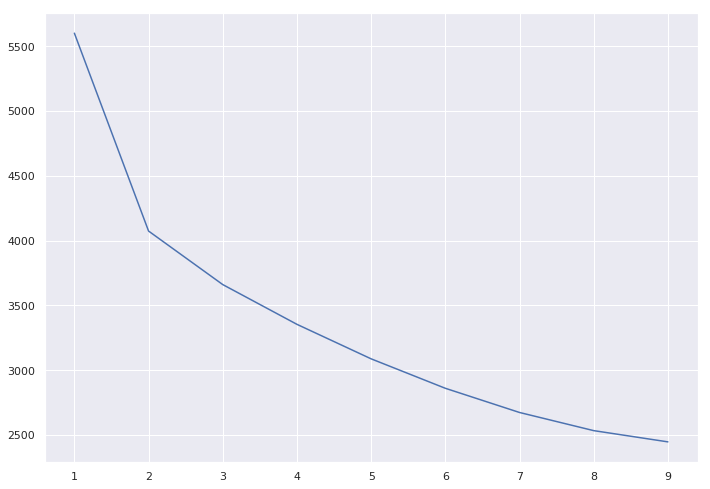

In [61]:
# We visualize to show where the elbow breaks.
inertia=[]
for i in range(1,10):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(df_pokemon_scaled).inertia_)
  
sns.lineplot(y=inertia,x=range(1,10))
    

**Conclusion:** As we can seen on the plot above the major break is identified at two clusters thus this seems as a pragmatic number of clusters.



***1c. Visualize the first 2 principal components and color the datapoints by cluster.***

In [62]:
# As stated in the previous exercise we specify the number of clusters to two, because of the elbow break.
clusterer = KMeans(n_clusters=2) 
clusterer.fit(df_pokemon_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

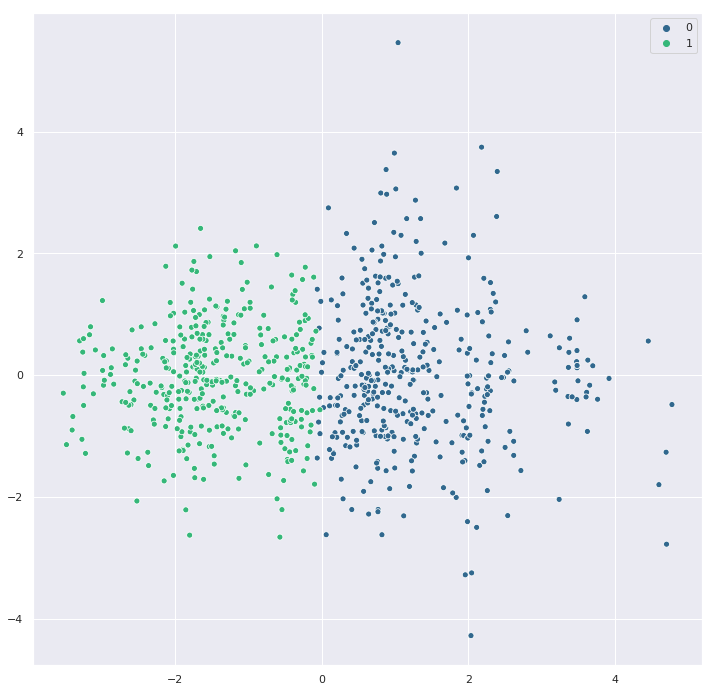

In [63]:
# The datapoints of the two prinical componets are visualized.
plt.figure(figsize=(12,12))
g = sns.scatterplot(df_pokemon_transformed[:,0], df_pokemon_transformed[:,1], hue=clusterer.labels_, legend='full', palette='viridis')

legend = g.get_legend()

**Conclusion:** The datapoints of two clusters has been visualized. We have a spread with a quite a few green outliers.

***1d. Inspect the distribution of the variable “Type1” across clusters. Does the
algorithm separate the different types of pokemon?***

In order to inspect the variable "Type!" across the clusters the interactive tool 'Bokeh' is used to plot and give us unique information about each individual point.

In [0]:
# Importing bokeh modules/expansions to perform the inspection.
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

In [0]:
# The data is defined enabling us to do the inspection.
data = {'y':df_pokemon_transformed[:,1],'x':df_pokemon_transformed[:,0], 'Type1': df_pokemon['Type1'],'cluster': pd.Series(clusterer.labels_).map({0:'a',1:'b',2:'c'})}

In [0]:
# We definde and transform a color-palette for the plot.
colors = factor_cmap('cluster', palette=Spectral6, factors=data['cluster'].unique())

In [0]:
# Data os transformed to the required 'Bokeh' format.
data=ColumnDataSource(data)

In [68]:
# Finally the requirements for the interactive tool is specifed and plotted. 
output_notebook()

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"
p=figure(tools=TOOLS)
p.hover.tooltips=[('Type',"@Type1")]
p.scatter(x='x',y='y',fill_alpha=0.8,
          color=colors,
          line_color=None,
          radius=0.1,
          source=data)
show(p)

**Conclusion:** The interactive tool above provides an interactive visualization of the two clusters. Looking at my interactive visualization it provides an option to identifiy individual plots/pokemons.

# 2. Supervised ML

***2a. Perform necessary ML preprocessing of your data if deemed necessary***

**Conclusion:** As the data was scaled in the part with Unsupervised ML, there's no further need for preprocessing. 

***2b. Split the data in a training (75%) and test (25%) dataset.***

In [0]:
# The module/expansions required to perform the split of the data is imported.
from sklearn.model_selection import train_test_split

Here the dataframe is split into two parts; one consisting of 75% of the dataframe and one with 25%.

In [0]:
# The requirements to perform the split are specified.
y = df_pokemon.Legendary 

X_train, X_test, y_train, y_test = train_test_split(df_pokemon_scaled, y, test_size=0.25, random_state=42)

**Conclusion:** The datasplit into training and test datasets has succesfully been performed.

***2c. Define a n-fold cross-validation workflow for your model testing.***

In [0]:
# Importing module/expansion
from sklearn.model_selection import cross_val_score

***2d. Fit three separate models on your training data, where you predict the “legendary” variable. Use a 1. Logistic regression, 2. Decision tree, and 3.
another algorithm of choice to do so***

**1. Logistic regression**

In [0]:
# Importing logistic Regression module/expansion.
from sklearn.linear_model import LogisticRegression
Model_1_LogReg = LogisticRegression()

In [73]:
# Splitting the variable into 4 parts for train and evaluation.
LogReg_scores = cross_val_score(Model_1_LogReg, X_train, y_train, cv = 4)
print(LogReg_scores)

[0.96666667 0.91333333 0.95333333 0.90666667]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
Model_1_LogReg.fit(X_train, y_train)
print(Model_1_LogReg.score(X_test, y_test))

0.945


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**2. Decision tree**

In [0]:
# Importing DecisionTree module/expansion.
from sklearn.tree import DecisionTreeClassifier

Model_2_DTree = DecisionTreeClassifier()

In [76]:
# Splitting the variable into 4 parts for train and evaluation.
DTree_scores = cross_val_score(Model_2_DTree, X_train, y_train, cv = 4)

print(DTree_scores)

[0.94666667 0.92       0.92       0.92      ]


In [77]:
Model_2_DTree.fit(X_train, y_train)
print(Model_2_DTree.score(X_test, y_test))


0.92


**3. XGBoost**

In [0]:
# Imorting XGBoost module/expansion.
import xgboost as xgb

Model_3_Boost = xgb.XGBClassifier()

In [79]:
# Splitting the variable into 4 parts for train and evaluation.
Boost_scores = cross_val_score(Model_3_Boost, X_train, y_train, cv = 4)

print(Boost_scores)

[0.94666667 0.93333333 0.96       0.96      ]


In [80]:
Model_3_Boost.fit(X_train, y_train)
print(Model_3_Boost.score(X_test, y_test))

0.945


**Conclusion:** As seen above the three models have been fitted. They have a high and similar output thus the models predicts very evenly. 

***2e. Use the fitted models to predict the “legendary” variable in your test data.***

**1. Logistic regression**

In [81]:
# Importing classification report module/expansion.
from sklearn.metrics import classification_report

# Using the module to evaluate Logistic Regression.
y_prediction_LogReg = Model_1_LogReg.predict(X_test)

print(classification_report(y_test, y_prediction_LogReg))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       187
        True       0.56      0.69      0.62        13

    accuracy                           0.94       200
   macro avg       0.77      0.83      0.80       200
weighted avg       0.95      0.94      0.95       200



**2. Decision tree**

In [82]:
# Using the module to evaluate DTree.
y_prediction_DTree = Model_2_DTree.predict(X_test)

print(classification_report(y_test, y_prediction_DTree))

              precision    recall  f1-score   support

       False       0.96      0.95      0.96       187
        True       0.40      0.46      0.43        13

    accuracy                           0.92       200
   macro avg       0.68      0.71      0.69       200
weighted avg       0.93      0.92      0.92       200



**3. XGBoost**

In [83]:
# Using the module to evaluate XGBoost.
y_prediction_boost = Model_3_Boost.predict(X_test)

print(classification_report(y_test, y_prediction_boost))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       187
        True       0.58      0.54      0.56        13

    accuracy                           0.94       200
   macro avg       0.78      0.76      0.77       200
weighted avg       0.94      0.94      0.94       200



**Conclusion:** Comparing the three models they similarly predict 'false' very evenly. The clear difference between is when predicting to true; where Logistic regression and XGBoost are slightly superior than DTree.

***2f. Evaluate the performance of these 3 models by comparing the predicted and the
true values of “legendary” in the test data. To do so, also create a confusion
matrix.***

In [84]:
!pip install -U mlxtend

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.0)


In [0]:
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

**1. Logistic regression**

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3e31c66588>)

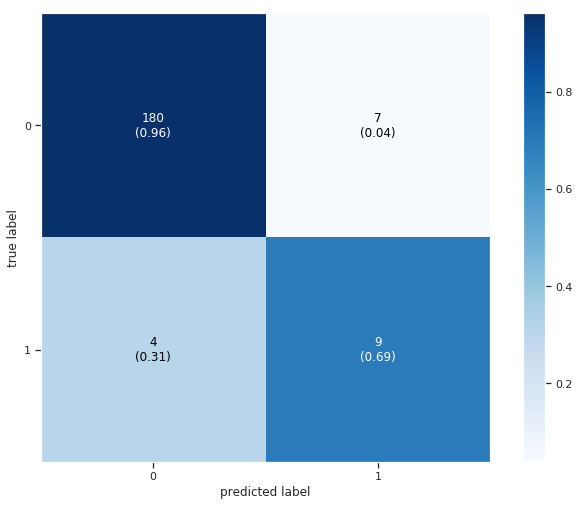

In [86]:
# Calculating confusion matrix.
confmatrix = confusion_matrix(y_test, y_prediction_LogReg)

# Plotting.
plot_confusion_matrix(conf_mat=confmatrix,
                      colorbar=True,
                      show_absolute=True,
                      show_normed=True)

**2. Decision tree**

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3e31c0ba20>)

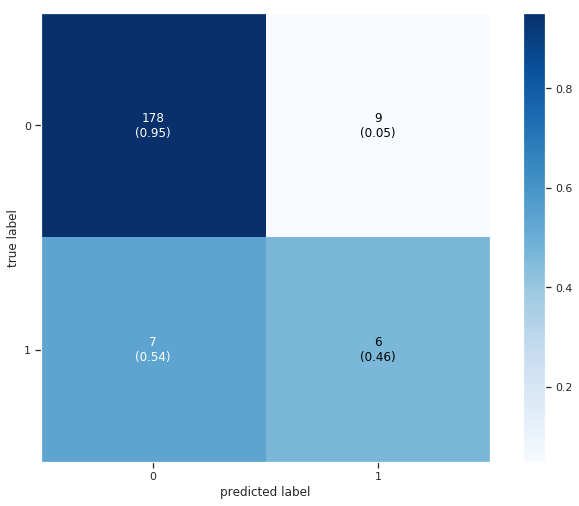

In [87]:
# Calculating confusion matrix.
confmatrix = confusion_matrix(y_test, y_prediction_DTree)

# Plotting.
plot_confusion_matrix(conf_mat=confmatrix,
                      colorbar=True,
                      show_absolute=True,
                      show_normed=True)

**3. XGBoost**

(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3e31b7a198>)

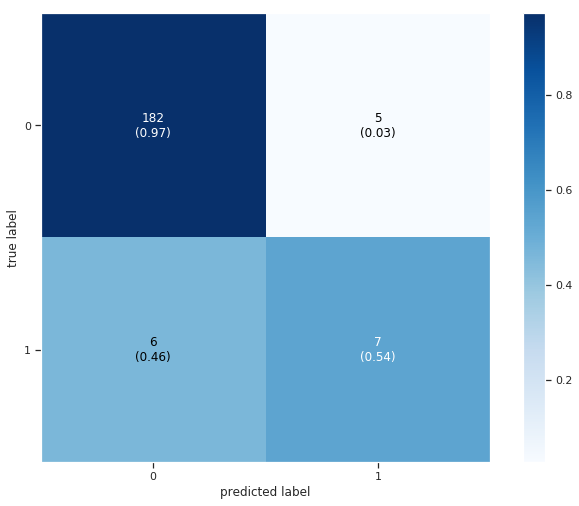

In [88]:
# Calculating confusion matrix.
confmatrix = confusion_matrix(y_test, y_prediction_boost)

# Plotting.
plot_confusion_matrix(conf_mat=confmatrix,
                      colorbar=True,
                      show_absolute=True,
                      show_normed=True)

**Conclusion:** Comparing the three confusion matrixes for predicting true value 'legendary', it's clear to see that our models are best at identifying (0,0) = False, False. For (1,1) = True, True the best model is the logistical regression model. DTree and XGBoost are  similar in predicting True, True. 